# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect9. Deep Neural Networks

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### <font color='blue'>Neural Networks</font>
>  
- 궁극적인 인간의 꿈 : 컴퓨터가 인간을 대신해서 일을 해준다.
- 즉, **Thinking Machine** 을 생각하며 뇌를 연구했다.
- 생각보다 <u>아주 복잡한 구조로 연결</u>되어 있어서 놀랐다.
- 연결구조를 좀더 깊이 있게 보았더니 <u>단순하게 동작</u>하는데 또한번 놀랐다.
- 뉴런이 연결되어 있으면 활성화가 되었고, 연결되어 있지않으면 비활성화로 되어 있어, <br/>이정도면 구현가능하겠다는 생각으로 Neural Networks를 구현하기 시작하였다.
<br/> → 이것이 초창기의 **'인공지능'** 이었다.

>  ### <font color="8888FF"> Reference </font>
- <a href='https://sebastianraschka.com/'>Machine Learning by Sebastian Raschka</a>
- <a href='http://natureofcode.com/book/chapter-10-neural-networks/'>Neural Networks [THE NATURE OF CODE, DANIEL SHIFFMAN]</a>
- <a href='http://carpedm20.github.io/2014/neural-net-translation/'>Neural Network를 이용한 손글씨 인지</a>

### <font color='blue'>Biological Neuron</font>
> 
<font color='#333CC'>
The Navy revealed the embryo of an eletronic computer today that it expects will be able to walk, talk, see, write, reproduce itself an be conscious of its existence... Dr. Frank Rosenblatt
<br><b>[The New York Times, July 08, 1958]</b>
</font>

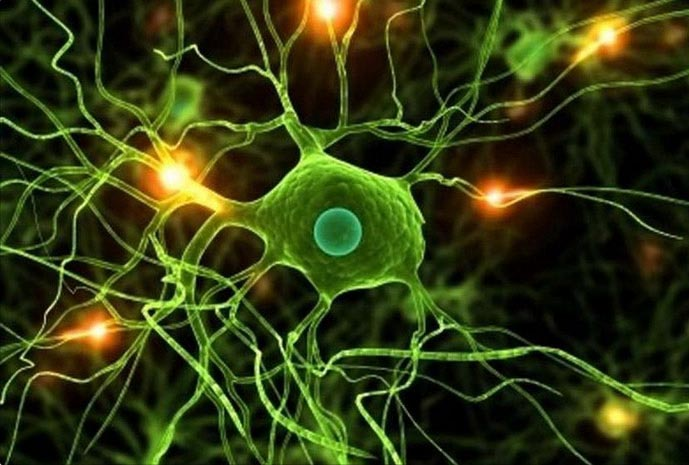

In [2]:
# Neuron
bpc.Figure(bpc.ML09_IMG_01)

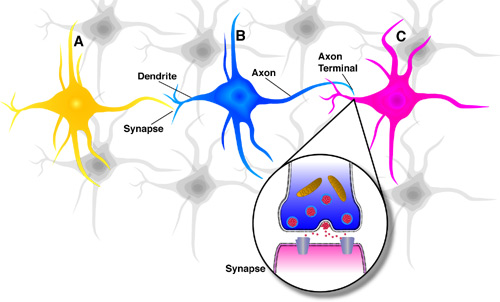

In [3]:
# 뉴런들간의 연결구조
bpc.Figure(bpc.ML09_IMG_02)

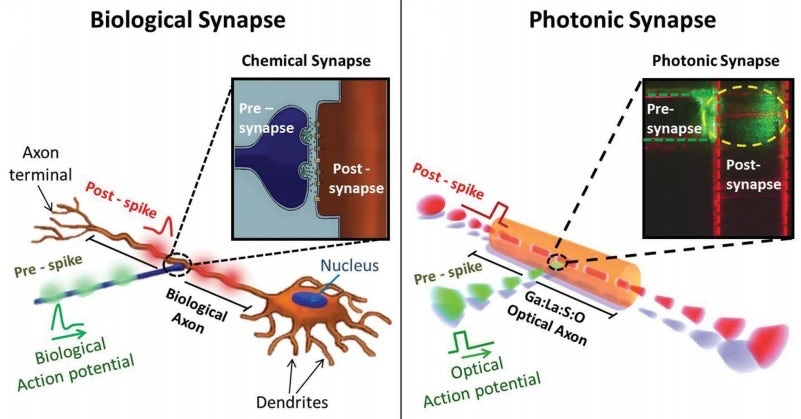

In [4]:
# Synapse
bpc.Figure(bpc.ML09_IMG_03)

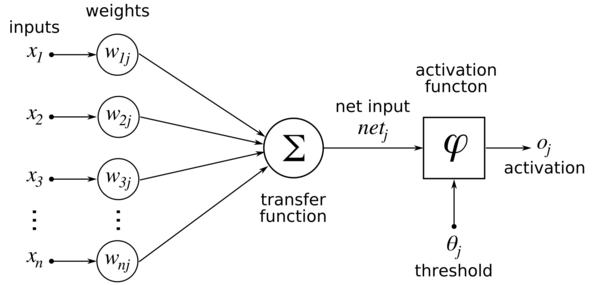

In [5]:
# Activation Functions
bpc.Figure(bpc.ML09_IMG_06)

### <font color='blue'>Neural Networks 구현에 대한 도전과 난관</font>
> 
- 뇌는 아주 복잡한 구조로 되어 있지만, 연결간의 동작이 아주 단순하여 로지컬 유닛들간의 결합으로 해결할 수 있다고 생각하였다.
<br> - 연결시 활성화되고, 연결이 끊어지면 비활성화 ==> AND, OR 유닛
- 초기 Neural Networks 연구시에 절망감을 주었던 문제
<br> - 하나의 로지스틱 리그레션 유닛으로 XOR 문제를 풀 수 없다.
<br> - 하지만, 여러개의 로지스틱 리그레션 유닛을 풀 수 있지만, 여러개의 weight, bias를 어떻게 학습시킬것인가? 


<table width="50%" border=1>
	<tr bgcolor='#FFFF'>
		<td colspan=4><div align="left"><font color="#0000CC"><b>AND, OR Dataset</b></font></div></td>
	</tr>	
	<tr bgcolor='#0000CC'>
		<td width="50"><div align="center"><font color="#FFFFFF">X1 </font></div></td>
		<td width="50"><div align="center"><font color="#FFFFFF">X2 </font></div></td>
		<td width="50"><div align="center"><font color="#FFFFFF">OR </font></div></td>
		<td width="50"><div align="center"><font color="#FFFFFF">AND</font></div></td>
	</tr>
	<tr>
		<td><div align="center">0</div></td>
		<td><div align="center">0</div></td>
		<td><div align="center">0</div></td>
		<td><div align="center">0</div></td>
	</tr>
	<tr>
		<td><div align="center">0</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">0</div></td>
	</tr>
	<tr>
		<td><div align="center">1</div></td>
		<td><div align="center">0</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">0</div></td>
	</tr>
	<tr>
		<td><div align="center">1</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">1</div></td>
	</tr>
</table>


<table width="50%" border=1>	
	<tr bgcolor='#FFFF'>
		<td colspan=3><div align="left"><font color="#0000CC"><b>XOR Dataset : Big Challenge !!</b></font></div></td>
	</tr>	
	<tr bgcolor='#0000CC'>
		<td width="50" ><div align="center"><font color="#FFFFFF">X1 </font></div></td>
		<td width="50" ><div align="center"><font color="#FFFFFF">X2 </font></div></td>
		<td width="100"><div align="center"><font color="#FFFFFF">XOR </font></div></td>
	</tr>
	<tr>
		<td><div align="center">0</div></td>
		<td><div align="center">0</div></td>
		<td><div align="center">0</div></td>
	</tr>
	<tr>
		<td><div align="center">0</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">1</div></td>
	</tr>
	<tr>
		<td><div align="center">1</div></td>
		<td><div align="center">0</div></td>
		<td><div align="center">1</div></td>
	</tr>
	<tr>
		<td><div align="center">1</div></td>
		<td><div align="center">1</div></td>
		<td><div align="center">0</div></td>
	</tr>
</table>


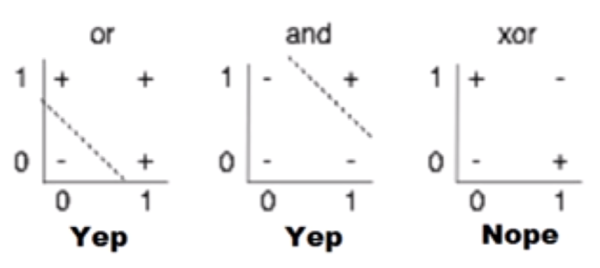

In [6]:
# XOR Problem : Linearly Separable?
bpc.Figure(bpc.ML09_IMG_11)

## 1. xor.py
> XOR with logistic regression? 
- One logistic regression unit cannot separate XOR
- Multiple logistic regression units : training many weight, many bias
<br><br>$$H(X) = \frac{1}{1 + e^-W^TX} $$
<br><br>$$cost(W) = -\frac{1}{m} \sum y log(H(x)) + (1-y)(log(1 - H(x)) $$
<br><br>$$W := W - α \frac{σ}{σW} cost(W) $$

In [10]:
# XOR, This example does not work
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1]], dtype=np.float32)    # AND
# y_data = np.array([[0], [1], [1], [1]], dtype=np.float32)    # OR
# y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)    # XOR

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function   cf.Sigmoid
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [11]:
sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(10001)):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        print("\nstep: {step}, \nsess.run(cost, feed_dict[X: x_data, Y: y_data]): {run_cost}, \nsess.run(W): \n{run_weight}".format(
                step = step, 
                run_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
                run_weight = sess.run(W)
            ))


A Jupyter Widget


step: 0, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.5119504928588867, 
sess.run(W): 
[[ 2.1289144 ]
 [-0.06878974]]

step: 1000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.12806808948516846, 
sess.run(W): 
[[3.3026798]
 [3.2596228]]

step: 2000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.07623714953660965, 
sess.run(W): 
[[4.3831162]
 [4.3791122]]

step: 3000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.053843025118112564, 
sess.run(W): 
[[5.106569 ]
 [5.1058083]]

step: 4000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.04145622253417969, 
sess.run(W): 
[[5.6460366]
 [5.6458216]]

step: 5000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.03363293036818504, 
sess.run(W): 
[[6.0750675]
 [6.07499  ]]

step: 6000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.028259193524718285, 
sess.run(W): 
[[6.4307356]
 [6.430701 ]]

step: 7000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.024347398430109024, 
sess.run(W): 
[[6.734223]
 [6.

In [12]:
# Accuracy report
h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict={X: x_data, Y: y_data})
print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


Hypothesis: 
[[1.1916666e-05]
 [1.9953087e-02]
 [1.9953152e-02]
 [9.7205383e-01]] 

Correct: 
[[0.]
 [0.]
 [0.]
 [1.]] 

Accuracy: 1.0


## <div align='center'><font color='#CC0000'> It does Not work. ㅠㅠ

<hr>
## 2. xor-nn.py
> Neural Network (NN) 
- "No one on earth had found a viable way to train* " by Marvin Minsky
- XOR using NN
- http://cs231n.github.io/convolutional-networks/ 

### <font color='blue'>Perceptrons</font>
> By Marvin Minsky, founder of the MIT AI lab
- We need to use MLP, multilayer perceptrons (Multilayer neural nets)
- No one on earth had found a viable way to train MLPs good enough to learn such simple functions.

# A regular 3-layer Neural Network.


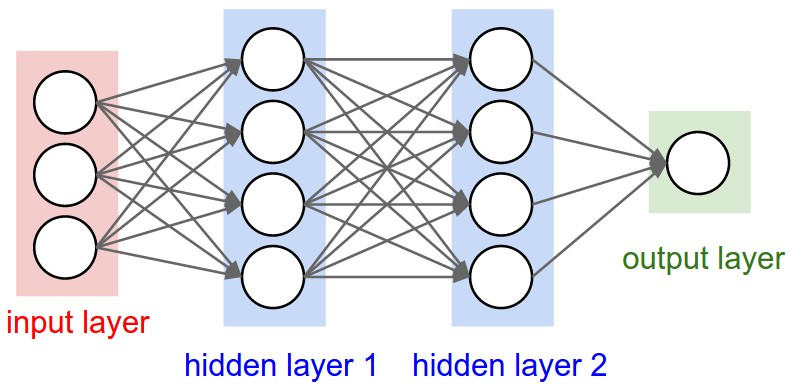

In [10]:
text = '# A regular 3-layer Neural Network.'
print(text)
bpc.Figure(bpc.ML09_IMG_12)

# A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers.


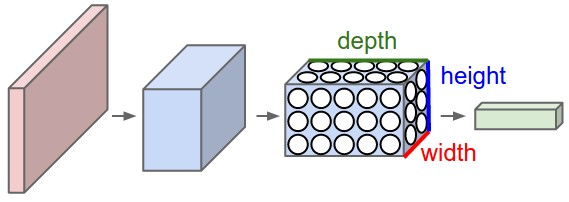

In [11]:
text = '# A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers.'
print(text)
bpc.Figure(bpc.ML09_IMG_13)

Every layer of a ConvNet transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).
<br>
<hr>

In [12]:
# XOR using NN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [13]:
sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(10001)):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
        print("\nstep: {step}, \nsess.run(cost, feed_dict[X: x_data, Y: y_data]): {run_cost}, \nsess.run([W1, W2]): \n{run_weight}".format(
                step = step, 
                run_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
                run_weight = sess.run([W1, W2])
            ))


A Jupyter Widget


step: 0, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 1.2737581729888916, 
sess.run([W1, W2]): 
[array([[ 2.1355143 , -0.0782264 ],
       [ 0.04496152, -0.48487958]], dtype=float32), array([[-0.6957488],
       [-1.3244522]], dtype=float32)]

step: 1000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.690781831741333, 
sess.run([W1, W2]): 
[array([[ 2.0760124 , -0.59124696],
       [ 0.04525169, -0.8189021 ]], dtype=float32), array([[-0.09633146],
       [-0.6391551 ]], dtype=float32)]

step: 2000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6554961204528809, 
sess.run([W1, W2]): 
[array([[ 2.072738  , -1.6827205 ],
       [ 0.19714442, -1.6965861 ]], dtype=float32), array([[-0.3493708],
       [-1.5777191]], dtype=float32)]

step: 3000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.4786366820335388, 
sess.run([W1, W2]): 
[array([[ 2.054418 , -3.613225 ],
       [ 1.0434556, -3.448598 ]], dtype=float32), array([[-1.7055986],
       [-3.8733025]], dtype=float32)

In [14]:
# Accuracy report
h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict={X: x_data, Y: y_data})
print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


Hypothesis: 
[[0.01368036]
 [0.98169047]
 [0.9817343 ]
 [0.01679078]] 

Correct: 
[[0.]
 [1.]
 [1.]
 [0.]] 

Accuracy: 1.0


# <div align='center'><font color='0000CC'> It work Well !! ^^

<hr>
## 3. xor-nn-wide-deep.py
> Wide & Deep NN for XOR

In [15]:
# XOR-NN-Wide-Deep
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [16]:
sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(10001)):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
        print("\nstep: {step}, \nsess.run(cost, feed_dict[X: x_data, Y: y_data]): {run_cost}, \nsess.run([W1, W2]): \n{run_weight}".format(
                step = step, 
                run_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
                run_weight = sess.run([W1, W2])
            ))


A Jupyter Widget


step: 0, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 1.5568962097167969, 
sess.run([W1, W2]): 
[array([[-0.60164016,  0.8919202 ,  0.35191226,  0.56761146, -0.99739665,
         0.32676136, -0.0275667 , -0.7428496 , -0.95138216, -2.952086  ],
       [ 2.1419542 ,  1.1751897 ,  0.3820754 , -1.32208   , -0.01911528,
         0.16187686, -3.0404184 ,  0.2068328 ,  0.3681465 , -1.5922024 ]],
      dtype=float32), array([[-0.8270249 , -0.5908381 , -0.9152915 , -1.6387377 , -0.39875317,
        -0.07010718, -0.62081033, -1.494441  ,  0.23517574, -0.9144239 ],
       [-0.7995736 ,  1.6431977 ,  0.7156355 ,  1.8664869 , -0.38515177,
         0.40816587, -0.6172208 , -0.09925716,  0.2734332 , -1.2857459 ],
       [-0.08891804,  0.20978071, -0.9512092 ,  0.33139288, -2.0785854 ,
        -0.48373953,  1.2817999 ,  0.48855504,  0.47712448,  0.98934746],
       [ 1.07698   ,  1.2265451 , -0.7964994 , -0.08373559, -0.36422762,
        -0.32580382, -0.06039998,  2.4420319 ,  0.18790258,  0.514

      dtype=float32)]

step: 5000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.004114406183362007, 
sess.run([W1, W2]): 
[array([[-2.1392155 ,  0.38450858,  1.1914296 ,  2.9709525 , -1.4390204 ,
         0.8570595 , -0.4236593 , -2.1464028 , -0.87071687, -4.5430603 ],
       [ 4.1819224 ,  2.1758418 ,  0.8433217 , -2.2134223 ,  0.02538879,
         1.1469911 , -3.0294483 ,  0.26470283,  0.1241906 , -4.342549  ]],
      dtype=float32), array([[-2.43437600e+00, -6.39513373e-01, -8.94064486e-01,
        -2.03757644e+00, -8.58751476e-01, -1.08680308e+00,
        -9.32473958e-01, -1.68852866e+00,  2.41930532e+00,
        -2.56775916e-01],
       [-1.24309528e+00,  1.66035354e+00,  7.10063100e-01,
         1.89283085e+00, -3.77711922e-01, -6.93072099e-03,
        -7.93483019e-01, -2.20838845e-01,  1.00259900e+00,
        -8.33047032e-01],
       [-4.71435823e-02,  1.57664821e-01, -9.57229733e-01,
        -1.05369546e-01, -2.04938984e+00, -9.51687932e-01,
         1.17807853e+00,  4.9

      dtype=float32)]

step: 9000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.0015432829968631268, 
sess.run([W1, W2]): 
[array([[-2.2905624 ,  0.31264895,  1.2261422 ,  3.1293235 , -1.4659196 ,
         0.91823894, -0.42628193, -2.2062628 , -0.86725616, -4.628976  ],
       [ 4.3300953 ,  2.1858873 ,  0.89140004, -2.3019536 ,  0.02352361,
         1.1806611 , -3.0294483 ,  0.2899881 ,  0.13267194, -4.4322057 ]],
      dtype=float32), array([[-2.5530941 , -0.64891016, -0.8898972 , -2.1382318 , -0.90954435,
        -1.1675049 , -0.9569637 , -1.6976522 ,  2.5697742 , -0.23532577],
       [-1.293904  ,  1.6548513 ,  0.71306366,  1.8335993 , -0.38305882,
        -0.02651213, -0.8038535 , -0.22813427,  1.0286825 , -0.8278212 ],
       [-0.05732943,  0.15646869, -0.9561251 , -0.16973469, -2.062842  ,
        -0.97070277,  1.1664636 ,  0.49975324,  1.3239261 ,  1.5018486 ],
       [ 1.9981706 ,  1.0460223 , -0.807319  , -1.5916758 , -0.347468  ,
        -1.1123209 , -0.11350182,  2.6

In [17]:
# Accuracy report
h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict={X: x_data, Y: y_data})
# print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


Hypothesis: 
[[9.6710393e-04]
 [9.9877375e-01]
 [9.9876839e-01]
 [1.8678069e-03]] 

Correct: 
[[0.]
 [1.]
 [1.]
 [0.]] 

Accuracy: 1.0


In [18]:
# TensorBoard : TF logging/debuging tool

<hr>
## 4. xor-tensorboard.py
> TensorBoard : TF logging/debuging tool   
- Visualize your TF graph
- Plot quantitative metrics
- Show additional data

![Graph](./images/lab09_tensorboard_00.png)

In [19]:
# XOR-NN-Wide-Deep
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./graph/logs/xor_logs")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


A Jupyter Widget

0 0.74719703 [array([[-0.75784916,  2.0900862 ],
       [ 0.28375602,  1.7743492 ]], dtype=float32), array([[-0.19245267],
       [ 1.0476829 ]], dtype=float32)]
100 0.6982726 [array([[-0.7526636,  2.094702 ],
       [ 0.2903726,  1.7818662]], dtype=float32), array([[-0.30330837],
       [ 0.9480304 ]], dtype=float32)]
200 0.67931956 [array([[-0.7478747 ,  2.1008089 ],
       [ 0.29744324,  1.7911739 ]], dtype=float32), array([[-0.3741989],
       [ 0.8937905]], dtype=float32)]
300 0.67203724 [array([[-0.7440029,  2.1077917],
       [ 0.3042569,  1.8015151]], dtype=float32), array([[-0.41955322],
       [ 0.86854106]], dtype=float32)]
400 0.6690074 [array([[-0.7409306 ,  2.1153162 ],
       [ 0.31074452,  1.8124936 ]], dtype=float32), array([[-0.44932145],
       [ 0.8609858 ]], dtype=float32)]
500 0.66747934 [array([[-0.73841894,  2.1232078 ],
       [ 0.31700346,  1.8239056 ]], dtype=float32), array([[-0.4697692],
       [ 0.8640336]], dtype=float32)]
600 0.66647017 [array([[-0.73626

       [ 1.7239293]], dtype=float32)]
5100 0.6223017 [array([[-0.66586214,  2.6282368 ],
       [ 0.6930073 ,  2.506908  ]], dtype=float32), array([[-0.8746612],
       [ 1.7446617]], dtype=float32)]
5200 0.6210999 [array([[-0.6650648,  2.64134  ],
       [ 0.7035597,  2.5237517]], dtype=float32), array([[-0.8847429],
       [ 1.7654202]], dtype=float32)]
5300 0.6198909 [array([[-0.6643362 ,  2.6545014 ],
       [ 0.71420616,  2.5406394 ]], dtype=float32), array([[-0.89489824],
       [ 1.7862027 ]], dtype=float32)]
5400 0.6186751 [array([[-0.66367865,  2.667719  ],
       [ 0.72494614,  2.5575671 ]], dtype=float32), array([[-0.90512663],
       [ 1.8070062 ]], dtype=float32)]
5500 0.6174526 [array([[-0.6630945 ,  2.680992  ],
       [ 0.73577917,  2.5745323 ]], dtype=float32), array([[-0.91542786],
       [ 1.8278277 ]], dtype=float32)]
5600 0.61622375 [array([[-0.6625856,  2.6943164],
       [ 0.7467045,  2.591536 ]], dtype=float32), array([[-0.9258017],
       [ 1.8486663]], dtype=f

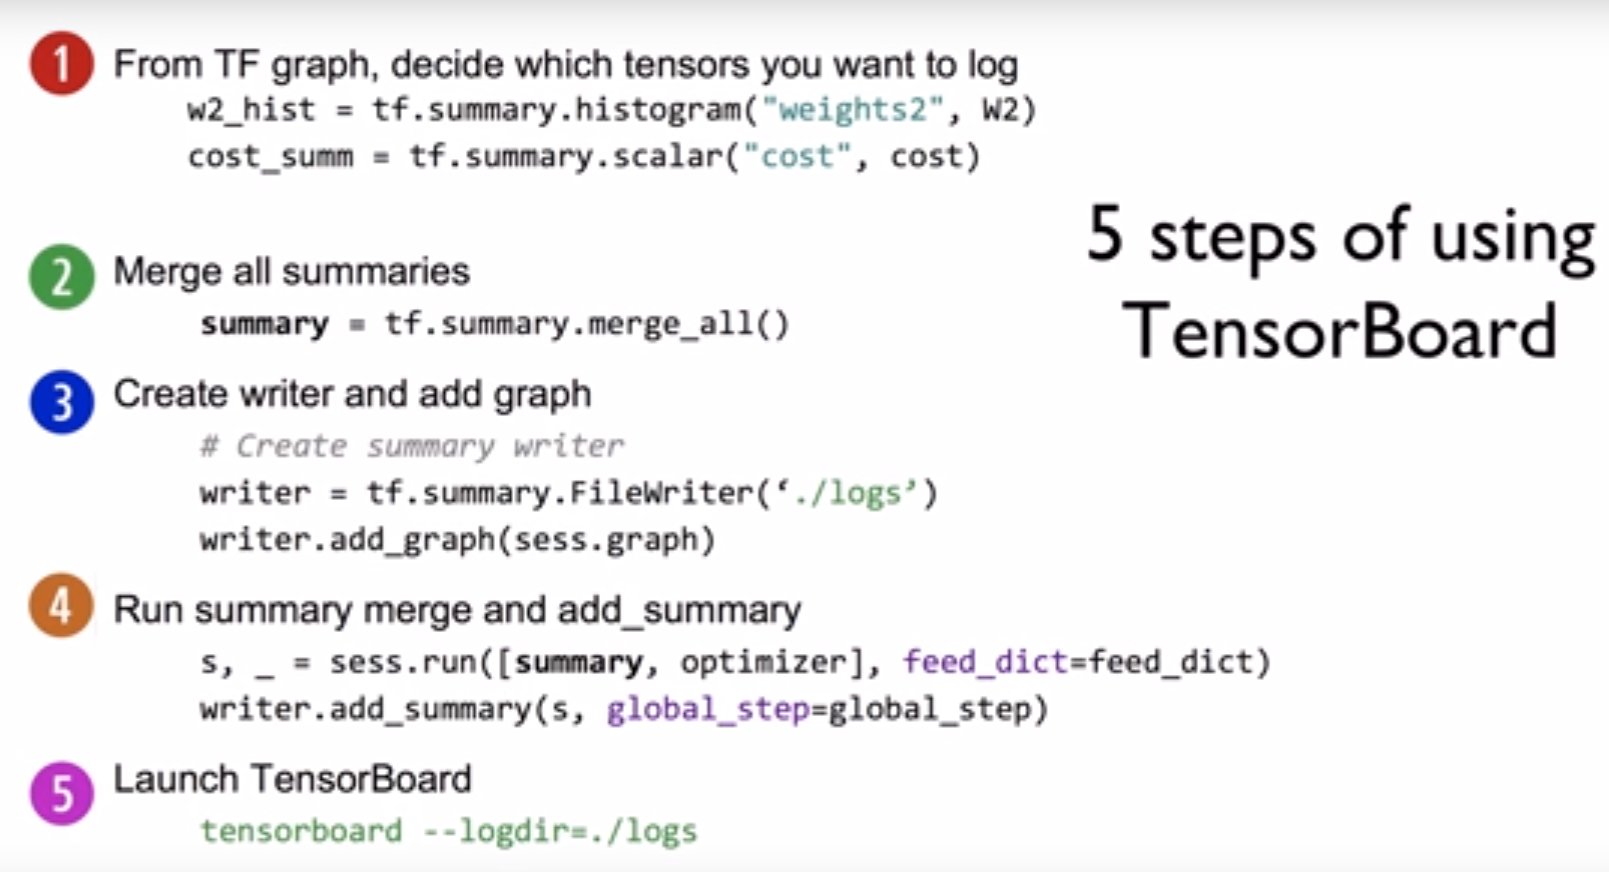

In [20]:
# Tensorboard
bpc.Figure(bpc.ML09_IMG_20, 800)

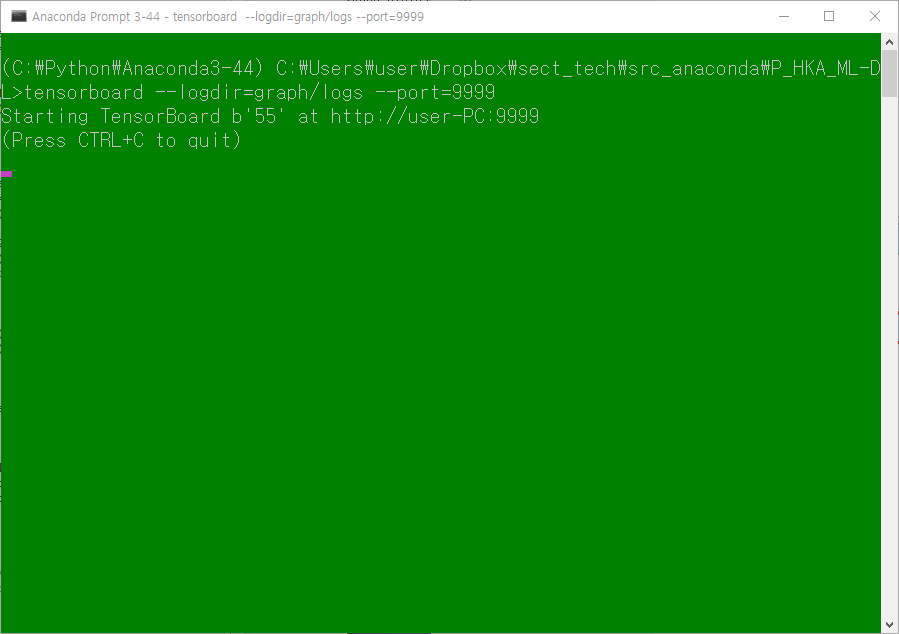

In [21]:
bpc.Figure(bpc.ML09_IMG_21)

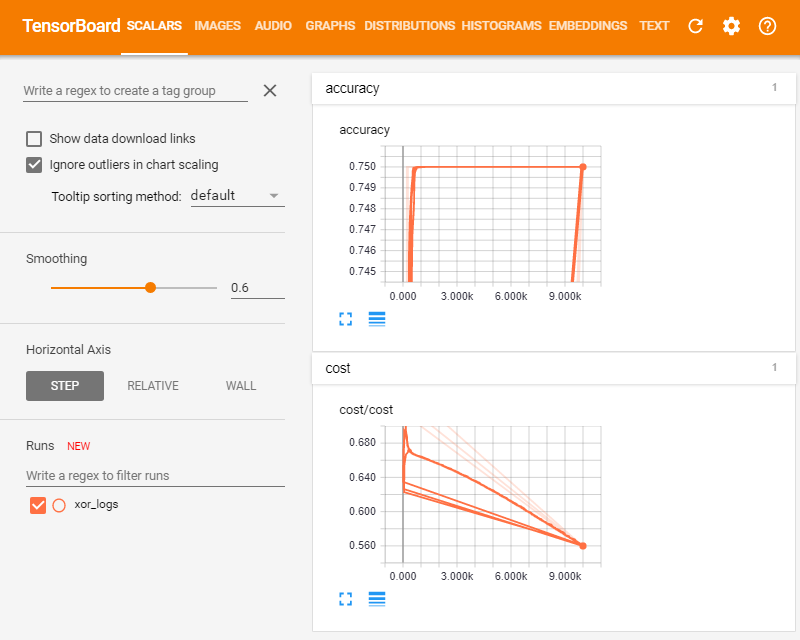

In [22]:
bpc.Figure(bpc.ML09_IMG_22)

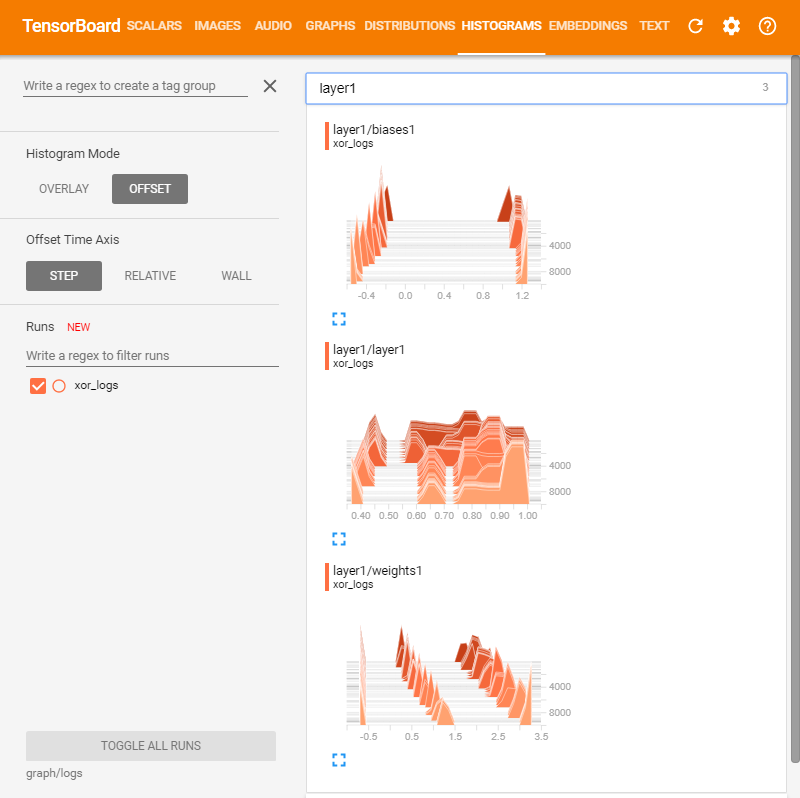

In [23]:
bpc.Figure(bpc.ML09_IMG_23)

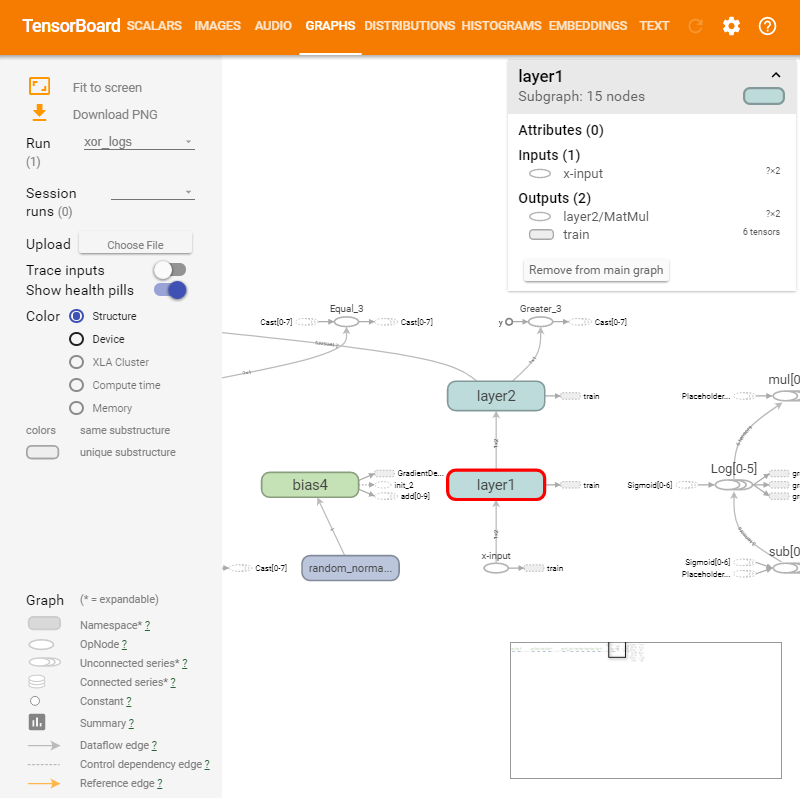

In [24]:
bpc.Figure(bpc.ML09_IMG_24)

<hr>
## 5. linear_back_prop.py
> Backpropagation
- http://blog.aloni.org/posts/backprop-with-tensorflow/
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
- WIP

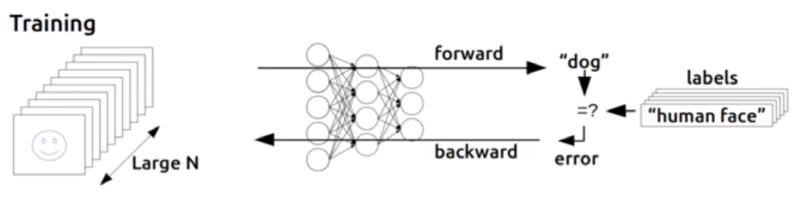

In [25]:
# Backpropagation
bpc.Figure(bpc.ML09_IMG_15)

In [26]:
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[1.], [2.], [3.]]
y_data = [[1.], [2.], [3.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([1, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

# diff
# assert는 디버깅 모드에서만 효과가 있고 릴리즈에서는 아무런 일도 하지 않기 때문에 예외처리랑 비슷하지만 좀 다른 상황에서 쓴다.
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print("X\t: {X}, \nW\t: {W}, \nd_l1\t: {d_l1}, \nd_w\t: {d_w}".format(
    X = X, 
    W = W, 
    d_l1 = d_l1, 
    d_w  = d_w
    ))

# Updating network using gradients
learning_rate = 0.1
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))


X	: Tensor("Placeholder_6:0", shape=(?, 1), dtype=float32), 
W	: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32_ref>, 
d_l1	: Tensor("sub_6:0", shape=(?, 1), dtype=float32), 
d_w	: Tensor("MatMul_8:0", shape=(1, 1), dtype=float32)


In [27]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

# for step in range(1001):
#     # RMSE = reduce_mean_square
#     rmse = sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data})
#     print("step: {s} \t RMSE: {r}".format(
#         s=step, 
#         r=rmse
#     ))

# RMSE = reduce_mean_square
for i in tqdm_notebook(range(1001)):
    print("{i} \t: {r}".format( 
        i = i, 
        r = sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data})
    ))


A Jupyter Widget

0 	: [[array([[-1.3526864]], dtype=float32), 4.823657], 4.8555865]
1 	: [[array([[-0.95311964]], dtype=float32), 4.8118286], 3.7040799]
2 	: [[array([[-1.1058494]], dtype=float32), 4.7212696], 3.3632095]
3 	: [[array([[-0.990422]], dtype=float32), 4.6703124], 3.2160637]
4 	: [[array([[-1.0060186]], dtype=float32), 4.6013656], 3.1165533]
5 	: [[array([[-0.9584119]], dtype=float32), 4.542433], 3.0300484]
6 	: [[array([[-0.9420949]], dtype=float32), 4.4798717], 2.9483044]
7 	: [[array([[-0.91108507]], dtype=float32), 4.4203033], 2.8693256]
8 	: [[array([[-0.88774794]], dtype=float32), 4.36049], 2.792594]
9 	: [[array([[-0.86119473]], dtype=float32), 4.3019905], 2.717946]
10 	: [[array([[-0.8367164]], dtype=float32), 4.2440305], 2.6453016]
11 	: [[array([[-0.8117317]], dtype=float32), 4.1869707], 2.5745995]
12 	: [[array([[-0.7874898]], dtype=float32), 4.13062], 2.505788]
13 	: [[array([[-0.7633761]], dtype=float32), 4.075056], 2.4388158]
14 	: [[array([[-0.7396832]], dtype=float32), 4.020

232 	: [[array([[0.9092081]], dtype=float32), 0.20981191], 0.0064650723]
233 	: [[array([[0.9104296]], dtype=float32), 0.2069891], 0.0062922635]
234 	: [[array([[0.9116347]], dtype=float32), 0.20420426], 0.006124091]
235 	: [[array([[0.91282356]], dtype=float32), 0.20145689], 0.005960423]
236 	: [[array([[0.9139965]], dtype=float32), 0.1987465], 0.005801123]
237 	: [[array([[0.9151535]], dtype=float32), 0.19607255], 0.00564607]
238 	: [[array([[0.91629505]], dtype=float32), 0.1934346], 0.005495168]
239 	: [[array([[0.91742116]], dtype=float32), 0.19083212], 0.005348295]
240 	: [[array([[0.91853225]], dtype=float32), 0.18826468], 0.005205346]
241 	: [[array([[0.9196284]], dtype=float32), 0.18573177], 0.0050662397]
242 	: [[array([[0.9207096]], dtype=float32), 0.18323292], 0.0049308315]
243 	: [[array([[0.92177635]], dtype=float32), 0.1807677], 0.004799035]
244 	: [[array([[0.9228288]], dtype=float32), 0.17833565], 0.0046707704]
245 	: [[array([[0.92386705]], dtype=float32), 0.17593633],

452 	: [[array([[0.99538827]], dtype=float32), 0.010657222], 1.6680468e-05]
453 	: [[array([[0.9954503]], dtype=float32), 0.010513841], 1.6234148e-05]
454 	: [[array([[0.99551153]], dtype=float32), 0.010372391], 1.5800542e-05]
455 	: [[array([[0.995572]], dtype=float32), 0.010232844], 1.5378218e-05]
456 	: [[array([[0.9956315]], dtype=float32), 0.010095166], 1.4967171e-05]
457 	: [[array([[0.9956903]], dtype=float32), 0.009959343], 1.4567227e-05]
458 	: [[array([[0.9957483]], dtype=float32), 0.009825348], 1.4177894e-05]
459 	: [[array([[0.99580556]], dtype=float32), 0.009693164], 1.37989855e-05]
460 	: [[array([[0.9958618]], dtype=float32), 0.00956273], 1.34302e-05]
461 	: [[array([[0.9959176]], dtype=float32), 0.009434095], 1.3070672e-05]
462 	: [[array([[0.9959725]], dtype=float32), 0.009307165], 1.27216845e-05]
463 	: [[array([[0.99602675]], dtype=float32), 0.009181951], 1.2381923e-05]
464 	: [[array([[0.9960801]], dtype=float32), 0.009058403], 1.2050878e-05]
465 	: [[array([[0.9961

667 	: [[array([[0.99974924]], dtype=float32), 0.0005792254], 4.924766e-08]
668 	: [[array([[0.99975276]], dtype=float32), 0.00057145697], 4.7954213e-08]
669 	: [[array([[0.999756]], dtype=float32), 0.00056375604], 4.6682185e-08]
670 	: [[array([[0.99975926]], dtype=float32), 0.0005561743], 4.540709e-08]
671 	: [[array([[0.9997626]], dtype=float32), 0.0005487039], 4.4199812e-08]
672 	: [[array([[0.99976575]], dtype=float32), 0.00054131687], 4.3030965e-08]
673 	: [[array([[0.999769]], dtype=float32), 0.0005340451], 4.1905974e-08]
674 	: [[array([[0.99977195]], dtype=float32), 0.0005268449], 4.076685e-08]
675 	: [[array([[0.9997751]], dtype=float32), 0.00051977177], 3.9673257e-08]
676 	: [[array([[0.9997781]], dtype=float32), 0.0005127702], 3.8636568e-08]
677 	: [[array([[0.9997811]], dtype=float32), 0.00050587195], 3.7569748e-08]
678 	: [[array([[0.99978405]], dtype=float32), 0.00049907307], 3.6575447e-08]
679 	: [[array([[0.9997869]], dtype=float32), 0.00049235363], 3.5603993e-08]
680 

880 	: [[array([[0.99998605]], dtype=float32), 3.233294e-05], 1.5396988e-10]
881 	: [[array([[0.9999862]], dtype=float32), 3.1887892e-05], 1.4949819e-10]
882 	: [[array([[0.99998635]], dtype=float32), 3.146271e-05], 1.4446282e-10]
883 	: [[array([[0.99998665]], dtype=float32), 3.1053427e-05], 1.4095747e-10]
884 	: [[array([[0.99998677]], dtype=float32), 3.0624273e-05], 1.3725791e-10]
885 	: [[array([[0.99998695]], dtype=float32), 3.0211015e-05], 1.3380941e-10]
886 	: [[array([[0.99998707]], dtype=float32), 2.9797757e-05], 1.296409e-10]
887 	: [[array([[0.99998736]], dtype=float32), 2.9412313e-05], 1.2638661e-10]
888 	: [[array([[0.9999874]], dtype=float32), 2.9003028e-05], 1.242076e-10]
889 	: [[array([[0.9999876]], dtype=float32), 2.8613611e-05], 1.196175e-10]
890 	: [[array([[0.9999878]], dtype=float32), 2.8232142e-05], 1.1702166e-10]
891 	: [[array([[0.999988]], dtype=float32), 2.785862e-05], 1.14463695e-10]
892 	: [[array([[0.9999881]], dtype=float32), 2.7473176e-05], 1.1054624e-10

In [28]:
print(sess.run(hypothesis, feed_dict={X: x_data}))

[[1.0000036]
 [2.0000007]
 [2.999998 ]]


<hr>
## 6. multi_linear_back_prop.py
> Backpropagation (chain rule)
- http://blog.aloni.org/posts/backprop-with-tensorflow/
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
- WIP

In [29]:
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([3, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

print("H.shape\t: {h_shape} \nY.shape\t: {y_shape}".format(
        h_shape = hypothesis.shape, 
        y_shape = Y.shape
    ))

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print("X \t: {X}, \nd_l1 \t: {d_l1}, \nd_w \t: {d_w}".format(
        X = X, 
        d_l1 = d_l1, 
        d_w = d_w
    ))

# Updating network using gradients
# learning_rate = 1e-6
learning_rate = 1e-5

step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))


H.shape	: (?, 1) 
Y.shape	: (?, 1)
X 	: Tensor("Placeholder_8:0", shape=(?, 3), dtype=float32), 
d_l1 	: Tensor("sub_10:0", shape=(?, 1), dtype=float32), 
d_w 	: Tensor("MatMul_10:0", shape=(3, 1), dtype=float32)


In [30]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)


# RMSE = reduce_mean_square
for i in range(10001):
    if i % 1000 == 0:
        print("{i} \t: {r}".format( 
            i = i, 
            r = sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data})
        ))


C:\Python\Anaconda3-50\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0 	: [[array([[ 2.4106836 ],
       [ 0.49077898],
       [-0.55601394]], dtype=float32), 5.003195], 103821.49]
1000 	: [[array([[ 2.2724152 ],
       [ 0.35336596],
       [-0.69549847]], dtype=float32), 5.002871], 1056.4852]
2000 	: [[array([[ 2.2858784 ],
       [ 0.36753315],
       [-0.6814867 ]], dtype=float32), 5.0029006], 22.601477]
3000 	: [[array([[ 2.284123 ],
       [ 0.3664962],
       [-0.682871 ]], dtype=float32), 5.0028944], 12.189827]
4000 	: [[array([[ 2.283894  ],
       [ 0.36698398],
       [-0.68271095]], dtype=float32), 5.002892], 12.074884]
5000 	: [[array([[ 2.2835124],
       [ 0.3673186],
       [-0.6827057]], dtype=float32), 5.002889], 12.063545]
6000 	: [[array([[ 2.2831464 ],
       [ 0.36766833],
       [-0.68268484]], dtype=float32), 5.0028863], 12.053217]
7000 	: [[array([[ 2.282779  ],
       [ 0.36801618],
       [-0.6826656 ]], dtype=float32), 5.0028834], 12.042986]
8000 	: [[array([[ 2.2824118 ],
       [ 0.36836395],
       [-0.6826461 ]], dtype=fl

In [31]:
x_data = [
    [73., 80., 75.], 
    [93., 88., 93.], 
    [89., 91., 90.], 
    [96., 98., 100.], 
    [73., 66., 70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]

In [32]:
print(sess.run(hypothesis, feed_dict={X: x_data}))

[[149.89456]
 [186.19366]
 [180.22195]
 [191.95103]
 [148.14078]]


<hr>
## 7. sigmoid_back_prop.py

In [33]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
X_data = xy[:, 0:-1]
N = X_data.shape[0]
y_data = xy[:, [-1]]

# y_data has labels from 0 ~ 6
print("y has one of the following values:", np.unique(y_data))
# print(np.unique(y_data))

# X_data.shape = (101, 16) => 101 samples, 16 features
# y_data.shape = (101, 1)  => 101 samples, 1 label
print(" * Shape of X data: ", X_data.shape)
print(" * Shape of y data: ", y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

target = tf.one_hot(y, nb_classes)  # one hot
target = tf.reshape(target, [-1, nb_classes])
target = tf.cast(target, tf.float32)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')


def sigma(x):
    # sigmoid function
    # σ(x) = 1 / (1 + exp(-x))
    return 1. / (1. + tf.exp(-x))


def sigma_prime(x):
    # derivative of the sigmoid function
    # σ'(x) = σ(x) * (1 - σ(x))
    return sigma(x) * (1. - sigma(x))


# Forward propagtion
layer_1 = tf.matmul(X, W) + b
y_pred = sigma(layer_1)

# Loss Function (end of forwad propagation)
loss_i = - target * tf.log(y_pred) - (1. - target) * tf.log(1. - y_pred)
loss = tf.reduce_sum(loss_i)

# Dimension Check
assert y_pred.shape.as_list() == target.shape.as_list()


# Back prop (chain rule)
# How to derive? please read "Neural Net Backprop in one slide!"
d_loss = (y_pred - target) / (y_pred * (1. - y_pred) + 1e-7)
d_sigma = sigma_prime(layer_1)
d_layer = d_loss * d_sigma
d_b = d_layer
d_W = tf.matmul(tf.transpose(X), d_layer)

# Updating network using gradients
learning_rate = 0.01
train_step = [
    tf.assign(W, W - learning_rate * d_W),
    tf.assign(b, b - learning_rate * tf.reduce_sum(d_b)),
]

# Prediction and Accuracy
prediction = tf.argmax(y_pred, 1)
acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(target, 1))
acct_res = tf.reduce_mean(tf.cast(acct_mat, tf.float32))


y has one of the following values: [0. 1. 2. 3. 4. 5. 6.]
 * Shape of X data:  (101, 16)
 * Shape of y data:  (101, 1)


In [34]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(500):
    sess.run(train_step, feed_dict={X: X_data, y: y_data})

    if step % 25 == 0:
        # Within 300 steps, you should see an accuracy of 100%
        step_loss, acc = sess.run([loss, acct_res], feed_dict={
                                  X: X_data, y: y_data})
        print("Step: {:3} \t Loss: {:8.5f} \t Acc: {:7.2%}".format(
            step, step_loss, acc))


Step:   0 	 Loss: 721.19958 	 Acc:  16.83%
Step:  25 	 Loss: 84.68682 	 Acc:  86.14%
Step:  50 	 Loss: 57.55897 	 Acc:  95.05%
Step:  75 	 Loss: 44.07873 	 Acc:  97.03%
Step: 100 	 Loss: 35.94043 	 Acc:  97.03%
Step: 125 	 Loss: 30.58869 	 Acc:  97.03%
Step: 150 	 Loss: 26.82763 	 Acc: 100.00%
Step: 175 	 Loss: 24.03328 	 Acc: 100.00%
Step: 200 	 Loss: 21.86403 	 Acc: 100.00%
Step: 225 	 Loss: 20.12177 	 Acc: 100.00%
Step: 250 	 Loss: 18.68468 	 Acc: 100.00%
Step: 275 	 Loss: 17.47387 	 Acc: 100.00%
Step: 300 	 Loss: 16.43600 	 Acc: 100.00%
Step: 325 	 Loss: 15.53372 	 Acc: 100.00%
Step: 350 	 Loss: 14.74004 	 Acc: 100.00%
Step: 375 	 Loss: 14.03493 	 Acc: 100.00%
Step: 400 	 Loss: 13.40320 	 Acc: 100.00%
Step: 425 	 Loss: 12.83311 	 Acc: 100.00%
Step: 450 	 Loss: 12.31538 	 Acc: 100.00%
Step: 475 	 Loss: 11.84260 	 Acc: 100.00%


In [35]:
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X: X_data})
for p, y in zip(pred, y_data):
    msg = "[{}]\t Prediction: {:d}\t True y: {:d}"
    print(msg.format(p == int(y[0]), p, int(y[0])))


[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 6	 True y: 6
[True]	 Prediction: 6	 True y: 6
[True]	 Prediction: 6	 True y: 6
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 5	 True y: 5
[True]	 Prediction: 4	 True y: 4
[True]	 Prediction: 4	 True y: 4
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Pr

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>